# Fetch Forecasts
Welcome to this tutorial! In this notebook, we will see how to retrieve forecasts from ensemble models, such as PEAROME.
In these models, a set (or ensemble) of forecasts is produced. Each forecast is achieved with the same numeric model (AROME for PEAROME), but with slightly different initialization parameters. This set of forecasts aims to give an indication of the range of possible weather conditions. Thus it gives a probabilistic approach of the weather forecast.
PEAROME produces a set of 25 members, so 25 possible scenarios for each of its available indicator.


We will cover the following cases:
- Retrieving data of a determinist model and a ensemble model
- For a single run date
- Specifying the "interval" parameter for each indicator
- Specifying the "forecast_horizon" parameter
- Specifying the "heights" or "pressures" parameters for each indicator



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from meteole import AromeForecast, AromePEForecast  # or ArpegeForecast, PiafForecast, AromePIForecast

In [6]:
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger("meteole")

**Requirements notice** : TODO Link to the documentation to have application_id

In [7]:
APP_ID = "<TO BE SET>"

## Init Client

In [9]:
# init client
arome_client = AromeForecast(application_id=APP_ID)  
pearome_client = AromePEForecast(application_id=APP_ID)  

In [10]:
# Available indicators for AROME
arome_client.INDICATORS

['GEOMETRIC_HEIGHT__GROUND_OR_WATER_SURFACE',
 'BRIGHTNESS_TEMPERATURE__GROUND_OR_WATER_SURFACE',
 'CONVECTIVE_AVAILABLE_POTENTIAL_ENERGY__GROUND_OR_WATER_SURFACE',
 'WIND_SPEED_GUST__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND',
 'WIND_SPEED__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND',
 'RELATIVE_HUMIDITY__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND',
 'LOW_CLOUD_COVER__GROUND_OR_WATER_SURFACE',
 'HIGH_CLOUD_COVER__GROUND_OR_WATER_SURFACE',
 'MEDIUM_CLOUD_COVER__GROUND_OR_WATER_SURFACE',
 'PRESSURE__GROUND_OR_WATER_SURFACE',
 'TOTAL_PRECIPITATION_RATE__GROUND_OR_WATER_SURFACE',
 'TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND',
 'U_COMPONENT_OF_WIND_GUST__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND',
 'U_COMPONENT_OF_WIND__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND',
 'V_COMPONENT_OF_WIND_GUST__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND',
 'V_COMPONENT_OF_WIND__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND',
 'TOTAL_WATER_PRECIPITATION__GROUND_OR_WATER_SURFACE',
 'TOTAL_SNOW_PRECIPITATION__GROUND_OR_WATER_SURFACE',
 'TOTAL_PRECIPITATION__GROUN

In [11]:
# Available indicators for PEAROME
pearome_client.INDICATORS

['BRIGHTNESS_TEMPERATURE__GROUND_OR_WATER_SURFACE',
 'BRIGHTNESS_TEMPERATURE_CHANNEL62__GROUND_OR_WATER_SURFACE',
 'INHIBITION_CONVECTIVE__GROUND_OR_WATER_SURFACE',
 'TOTAL_WATER_VAPOUR__GROUND_OR_WATER_SURFACE',
 'RELATIVE_DIVERGENCE__ISOBARIC_SURFACE',
 'RELATIVE_HUMIDITY__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND',
 'RELATIVE_HUMIDITY__ISOBARIC_SURFACE',
 'LOW_CLOUD_COVER__GROUND_OR_WATER_SURFACE',
 'PRECIPITATION_TYPE_MOST_SEVERE__GROUND_OR_WATER_SURFACE',
 'PRECIPITATION_TYPE__GROUND_OR_WATER_SURFACE',
 'PRESSURE__MEAN_SEA_LEVEL',
 'REFLECTIVITY_MAXIMUM__GROUND_OR_WATER_SURFACE',
 'REFLECTIVITY_DBZ__ISOBARIC_SURFACE',
 'MAXIMUM_TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND',
 'MINIMUM_TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND',
 'PSEUDO_ADIABATIC_POTENTIAL_TEMPERATURE__ISOBARIC_SURFACE',
 'TEMPERATURE__GROUND_OR_WATER_SURFACE',
 'TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND',
 'TEMPERATURE__ISOBARIC_SURFACE',
 'U_COMPONENT_OF_WIND_GUST__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND',
 'U

In [12]:
# pick a indicator
indicator = "TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND"

### Get parameters

If you want to select the different parameters available, you can retrieve them using the `get_capabilities` and `get_coverage_description`.


In [13]:
# get all the capabilities of the model
aro_capabilities = arome_client.get_capabilities()

# select one run, the most recent for example
most_recent_run_aro = pd.to_datetime(aro_capabilities['run'].max(), format="%Y-%m-%dT%H.%M.%SZ")

# get the coverage description for this indicator and this run
aro_cov_descr = arome_client.get_coverage_description(indicator + "___" + most_recent_run_aro.strftime("%Y-%m-%dT%H.%M.%SZ"))

print(aro_cov_descr)

INFO:meteole.forecast:Fetching all available coverages...
INFO:meteole.forecast:
	 Successfully fetched 6270 coverages,
	 representing 46 different indicators,
	 across the last 38 runs (from 2025-09-05T00.00.00Z to 2025-09-09T15.00.00Z)

	 Default run for `get_coverage`: 2025-09-09T15.00.00Z)


{'forecast_horizons': [datetime.timedelta(0), datetime.timedelta(seconds=3600), datetime.timedelta(seconds=7200), datetime.timedelta(seconds=10800), datetime.timedelta(seconds=14400), datetime.timedelta(seconds=18000), datetime.timedelta(seconds=21600), datetime.timedelta(seconds=25200), datetime.timedelta(seconds=28800), datetime.timedelta(seconds=32400), datetime.timedelta(seconds=36000), datetime.timedelta(seconds=39600), datetime.timedelta(seconds=43200), datetime.timedelta(seconds=46800), datetime.timedelta(seconds=50400), datetime.timedelta(seconds=54000), datetime.timedelta(seconds=57600), datetime.timedelta(seconds=61200), datetime.timedelta(seconds=64800), datetime.timedelta(seconds=68400), datetime.timedelta(seconds=72000), datetime.timedelta(seconds=75600), datetime.timedelta(seconds=79200), datetime.timedelta(seconds=82800), datetime.timedelta(days=1), datetime.timedelta(days=1, seconds=3600), datetime.timedelta(days=1, seconds=7200), datetime.timedelta(days=1, seconds=1080

### Fetch data using params of your choice

In [22]:
# Get for the AROME model, the forecast of Temperature at 2 meters for 24 first available forecast horizons
df_arome = arome_client.get_coverage(
             indicator=indicator,
             interval=None,                                                           
             forecast_horizons=aro_cov_descr["forecast_horizons"],            
             heights=[2],                                                             
             pressures=None,                                                            
             long = (1.0, 1.5),                                                 
             lat = (43, 43.5),                                                                                                          
             temp_dir=None,                                                          
         )
print(df_arome.head())

INFO:meteole.forecast:Using latest `run=2025-09-09T15.00.00Z`.
INFO:meteole.forecast:Using `coverage_id=TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND___2025-09-09T15.00.00Z`
INFO:meteole.clients:Retrying (attempt 1/10) - waiting 10s before retrying...
INFO:meteole.clients:Token expired, requesting a new one
INFO:meteole.clients:Retrying (attempt 2/10) - waiting 20s before retrying...
INFO:meteole.clients:Token expired, requesting a new one
INFO:meteole.clients:Retrying (attempt 3/10) - waiting 30s before retrying...
INFO:meteole.clients:Token expired, requesting a new one
INFO:meteole.clients:Retrying (attempt 4/10) - waiting 40s before retrying...
INFO:meteole.clients:Token expired, requesting a new one
INFO:meteole.clients:Retrying (attempt 5/10) - waiting 50s before retrying...
INFO:meteole.clients:Retrying (attempt 1/10) - waiting 10s before retrying...
INFO:meteole.clients:Retrying (attempt 2/10) - waiting 20s before retrying...
INFO:meteole.clients:Retrying (attempt 3/10) - wai

   latitude  longitude                 run forecast_horizon        t_2m
0      43.5       1.00 2025-09-09 15:00:00           0 days  292.241119
1      43.5       1.01 2025-09-09 15:00:00           0 days  292.230377
2      43.5       1.02 2025-09-09 15:00:00           0 days  292.425690
3      43.5       1.03 2025-09-09 15:00:00           0 days  292.541901
4      43.5       1.04 2025-09-09 15:00:00           0 days  292.383698


In [15]:
# Same for PEAROME
# get all the capabilities of the model
pearo_capabilities = pearome_client.get_capabilities()

# select one run, the most recent for example
most_recent_run_pearo = pd.to_datetime(pearo_capabilities['run'].max(), format="%Y-%m-%dT%H.%M.%SZ")

# get the coverage description for this indicator and this run
pearo_cov_descr = pearome_client.get_coverage_description(indicator + "___" + most_recent_run_pearo.strftime("%Y-%m-%dT%H.%M.%SZ"))

print(pearo_cov_descr)

INFO:meteole.forecast:Fetching all available coverages...
INFO:meteole.clients:Token expired, requesting a new one
INFO:meteole.clients:Retrying (attempt 1/10) - waiting 10s before retrying...
INFO:meteole.forecast:
	 Successfully fetched 1710 coverages,
	 representing 32 different indicators,
	 across the last 19 runs (from 2025-09-05T03.00.00Z to 2025-09-09T15.00.00Z)

	 Default run for `get_coverage`: 2025-09-09T15.00.00Z)
INFO:meteole.clients:Token expired, requesting a new one
INFO:meteole.clients:Retrying (attempt 1/10) - waiting 10s before retrying...


{'forecast_horizons': [datetime.timedelta(0), datetime.timedelta(seconds=3600), datetime.timedelta(seconds=7200), datetime.timedelta(seconds=10800), datetime.timedelta(seconds=14400), datetime.timedelta(seconds=18000), datetime.timedelta(seconds=21600), datetime.timedelta(seconds=25200), datetime.timedelta(seconds=28800), datetime.timedelta(seconds=32400), datetime.timedelta(seconds=36000), datetime.timedelta(seconds=39600), datetime.timedelta(seconds=43200), datetime.timedelta(seconds=46800), datetime.timedelta(seconds=50400), datetime.timedelta(seconds=54000), datetime.timedelta(seconds=57600), datetime.timedelta(seconds=61200), datetime.timedelta(seconds=64800), datetime.timedelta(seconds=68400), datetime.timedelta(seconds=72000), datetime.timedelta(seconds=75600), datetime.timedelta(seconds=79200), datetime.timedelta(seconds=82800), datetime.timedelta(days=1), datetime.timedelta(days=1, seconds=3600), datetime.timedelta(days=1, seconds=7200), datetime.timedelta(days=1, seconds=1080

In [17]:
# For the PEArome, get_coverage_description retrieve the description available for the member 0 by default. 
# However, it is possible to specify several members to compare the description of each member.
# It can be useful when the forecast horizons are not all the same accross members 
# (it can happen when the model is being updated.)
pearo_cov_descr_mult = pearome_client.get_coverage_description(indicator + "___" + 
                                                               most_recent_run_pearo.strftime("%Y-%m-%dT%H.%M.%SZ"),
                                                              numbers=[0,1,2])

print(pearo_cov_descr_mult)

{'number_0': {'forecast_horizons': [datetime.timedelta(0), datetime.timedelta(seconds=3600), datetime.timedelta(seconds=7200), datetime.timedelta(seconds=10800), datetime.timedelta(seconds=14400), datetime.timedelta(seconds=18000), datetime.timedelta(seconds=21600), datetime.timedelta(seconds=25200), datetime.timedelta(seconds=28800), datetime.timedelta(seconds=32400), datetime.timedelta(seconds=36000), datetime.timedelta(seconds=39600), datetime.timedelta(seconds=43200), datetime.timedelta(seconds=46800), datetime.timedelta(seconds=50400), datetime.timedelta(seconds=54000), datetime.timedelta(seconds=57600), datetime.timedelta(seconds=61200), datetime.timedelta(seconds=64800), datetime.timedelta(seconds=68400), datetime.timedelta(seconds=72000), datetime.timedelta(seconds=75600), datetime.timedelta(seconds=79200), datetime.timedelta(seconds=82800), datetime.timedelta(days=1), datetime.timedelta(days=1, seconds=3600), datetime.timedelta(days=1, seconds=7200), datetime.timedelta(days=1,

In [20]:
# Get for the PEAROME model, the forecast of Temperature at 2 meters for 24 first available forecast horizons
# For Ensemble models, the members (the numbers of each set of forecast) to retrieve must be specified 
# with the parameter numbers (in this example, we retrieve the 5 first members).
# PEAROME provides 25 members, from 0 to 24. Note that member 0 is the same as the AROME determinist model.
df_pearome = pearome_client.get_coverage(
             indicator=indicator,
             interval=None,                                                           
             forecast_horizons=pearo_cov_descr["forecast_horizons"],  
             numbers=range(5),
             heights=[2],                                                             
             pressures=None,                                                            
             long = (1.0, 1.5),                                                 
             lat = (43, 43.5),                                                                                                          
             temp_dir=None,                                                          
         )

# Note that the resulting dataframe has a new column "number" identifying each member of the ensemble forecast.
print(df_pearome.head())

INFO:meteole.forecast:Using latest `run=2025-09-09T15.00.00Z`.
INFO:meteole.forecast:Using `coverage_id=TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND___2025-09-09T15.00.00Z`


   latitude  longitude  number                 run forecast_horizon  \
0      43.5      1.000       0 2025-09-09 15:00:00           0 days   
1      43.5      1.025       0 2025-09-09 15:00:00           0 days   
2      43.5      1.050       0 2025-09-09 15:00:00           0 days   
3      43.5      1.075       0 2025-09-09 15:00:00           0 days   
4      43.5      1.100       0 2025-09-09 15:00:00           0 days   

         t_2m  
0  292.405914  
1  292.543610  
2  292.418610  
3  291.851227  
4  291.653961  


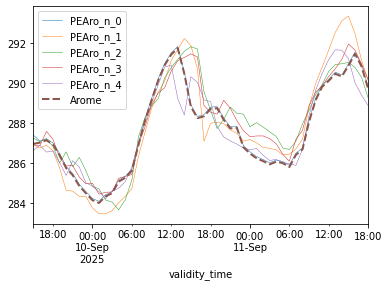

In [23]:
# Illustration by plotting each member of the PEAROME model (thin lines), 
# along with the single forecast of AROME model (dotted line)
# for a given location.
lat = 43
lon = 1

df_arome_single_loc = df_arome.loc[(df_arome["latitude"].round(2) == lat) & (df_arome["longitude"].round(2) == lon)].copy()
df_arome_single_loc.index = df_arome_single_loc['run'] + df_arome_single_loc['forecast_horizon']
df_pearome_single_loc = df_pearome.loc[(df_pearome["latitude"].round(2) == lat) & (df_pearome["longitude"].round(2) == lon)].copy()
df_pearome_single_loc['validity_time'] = (df_pearome_single_loc['run'] + df_pearome_single_loc['forecast_horizon'])

# reshape the result to have one column per member
reshaped_df = df_pearome_single_loc.pivot(index='validity_time', columns='number', values='t_2m')
reshaped_df.columns = [f"PEAro_n_{int(col)}" for col in reshaped_df.columns]

reshaped_df.plot(linewidth=0.5)
df_arome_single_loc['t_2m'].plot(linewidth=2, linestyle="--", label="Arome") 
plt.legend()